# Exercise 5.1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Simple Network**

We continue with the dataset first encountered in the previous exercise. Please refer to the discussion there for an introduction to the data and the learning objective.

Here, we manually implement a simple network architecture

In [ ]:
# The code snippet below is responsible for downloading the dataset
# - for example when running via Google Colab.
#
# You can also directly download the file using the link if you work
# with a local setup (in that case, ignore the !wget)
import os
if not os.path.exists("winequality-white.csv"):
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv --no-check-certificate

--2023-11-15 21:26:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-white.csv’

winequality-white.c     [  <=>               ] 258.23K  1.02MB/s    in 0.2s    

2023-11-15 21:26:21 (1.02 MB/s) - ‘winequality-white.csv’ saved [264426]



In [ ]:
# Before working with the data,
# we download and prepare all features

# load all examples from the file
data = np.genfromtxt('winequality-white.csv',delimiter=";",skip_header=1)

print("data:", data.shape)

# Prepare for proper training
np.random.seed(1234)
np.random.shuffle(data) # randomly sort examples

# take the first 3000 examples for training
# (remember array slicing from last week)
X_train = data[:3000,:11] # all features except last column
y_train = data[:3000,11]  # quality column

# and the remaining examples for testing
X_test = data[3000:,:11] # all features except last column
y_test = data[3000:,11] # quality column

print("First example:")
print("Features:", X_train[0])
print("Quality:", y_train[0])

data: (4898, 12)
First example:
Features: [6.100e+00 2.200e-01 4.900e-01 1.500e+00 5.100e-02 1.800e+01 8.700e+01
 9.928e-01 3.300e+00 4.600e-01 9.600e+00]
Quality: 5.0


# Problems

The goal is to implement the training of a neural network with one input layer, one hidden layer, and one output layer using gradient descent. We first (below) define the matrices and initialise with random values. We need W, b, W' and b'. The shapes will be:
  * W: (number of hidden nodes, number of inputs) named `W`
  * b: (number of hidden nodes) named `b`
  * W': (number of hidden nodes) named `Wp`
  * b': (one) named `bp`

Your tasks are:     
   * Implement a forward pass of the network as `dnn` (see below)
   * Implement a function that uses one data point to update the weights using gradient descent. You can follow the `update_weights` skeleton below
   * Now you can use the code below (training loop and evaluation) to train the network for multiple data points and even over several epochs. Try to find a set of hyperparameters (number of nodes in the hidden layer, learning rate, number of training epochs) that gives stable results. What is the best result (as measured by the loss on the training sample) you can get?

In [ ]:
# Initialise weights with suitable random distributions
hidden_nodes = 50 # number of nodes in the hidden layer
n_inputs = 11 # input features in the dataset

W = np.random.randn(hidden_nodes,11)*np.sqrt(2./n_inputs)
b = np.random.randn(hidden_nodes)*np.sqrt(2./n_inputs)
Wp = np.random.randn(hidden_nodes)*np.sqrt(2./hidden_nodes)
bp = np.random.randn((1))

print(W.shape)

(50, 11)


In [ ]:
# You can use this implementation of the ReLu activation function
def relu(x):
  return np.maximum(x, 0)

In [ ]:
def dnn(x,W,b,Wp,bp):
  """ Returns network output of forward pass """
  # TO DO: Calculate and return network output of forward pass
  # See Hint 1 for additional information
  hidden_output = relu(np.dot(W, x) + b)
  output = np.dot(Wp, hidden_output) + bp
  return output

In [ ]:
def update_weights(x,y, W, b, Wp, bp):
  """ Using one data point to update the weights with gradient descent """
  learning_rate = 0.0001 # TO DO: choose a suitable learning rate

  # TO DO: Calculate the network output (use the function dnn defined above)
  network_output = dnn(x, W, b, Wp, bp)

  # TO DO: Derive the gradient for each of W,b,Wp,bp by taking the partial
  # derivative of the loss function with respect to the variable and
  # then implement the resulting weight-update procedure
  # See Hint 2 for additional information

  hidden_output = relu(np.dot(W, x) + b)
  gradient_bp = 2 * (network_output - y)
  gradient_Wp = gradient_bp * hidden_output
  gradient_b = gradient_bp * Wp * np.heaviside(np.dot(W, x) + b, 0)
  gradient_W = np.outer(gradient_b, x)

  # You might need these numpy functions:
  # np.dot, np.outer, np.heaviside
  # Hint: Use .shape and print statements to make sure all operations
  # do what you want them to

  # TO DO: Update the weights/bias following the rule:  weight_new = weight_old - learning_rate * gradient

  W -= learning_rate * gradient_W
  b -= learning_rate * gradient_b
  Wp -= learning_rate * gradient_Wp
  bp -= learning_rate * gradient_bp

  return W, b, Wp, bp # return the new weights

# Training loop and evaluation below

In [ ]:
# The code below implements the training.
# If you correctly implement  dnn and update_weights above,
# you should not need to change anything below.
# (apart from increasing the number of epochs)

train_losses = []
test_losses = []

# How many epochs to train
# This will just train for one epoch
# You will want a higher number once everything works
n_epochs = 100

# Loop over the epochs
for ep in range(n_epochs):

    # Each epoch is a complete over the training data
    for i in range(X_train.shape[0]):

        # pick one example
        x = X_train[i]
        y = y_train[i]

        # use it to update the weights
        W,b,Wp,bp = update_weights(x,y,W,b,Wp,bp)

    # Calculate predictions for the full training and testing sample
    y_pred_train = [dnn(x,W,b,Wp,bp)[0] for x in X_train]
    y_pred = [dnn(x,W,b,Wp,bp)[0] for x in X_test]

    # Calculate aver loss / example over the epoch
    train_loss = sum((y_pred_train-y_train)**2) / y_train.shape[0]
    test_loss = sum((y_pred-y_test)**2) / y_test.shape[0]

    # print some information
    print("Epoch:",ep, "Train Loss:", train_loss, "Test Loss:", test_loss)

    # and store the losses for later use
    train_losses.append(train_loss)
    test_losses.append(test_loss)


# After the training:

# Prepare scatter plot
y_pred = [dnn(x,W,b,Wp,bp)[0] for x in X_test]

print("Best loss:", min(test_losses), "Final loss:", test_losses[-1])

print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])
plt.scatter(y_pred_train,y_train)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Prepare and loss over time
plt.plot(train_losses,label="train")
plt.plot(test_losses,label="test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


# Hint 1

We want a network with one hidden layer. As activiation in the hidden layer $\sigma$ we apply element-wise ReLu, while no activation is used for the output layer. The forward pass of the network then reads:
$$\hat{y}=\mathbf{W}^{\prime} \sigma(\mathbf{W} \vec{x}+\vec{b})+b^{\prime}$$

# Hint 2

For the regression problem the objective function is the mean squared error between the prediction and the true label $y$:
$$
L=(\hat{y}-y)^{2}
$$

Taking the partial derivatives - and diligently the applying chain rule - with respect to the different objects yields:

$$
\begin{aligned}
\frac{\partial L}{\partial b^{\prime}} &=2(\hat{y}-y) \\
\frac{\partial L}{\partial b_{k}} &=2(\hat{y}-y) \mathbf{W}_{k}^{\prime} \theta\left(\sum_{i} \mathbf{W}_{k i} x_{i}+b_{k}\right) \\
\frac{\partial L}{\partial \mathbf{W}_{k}^{\prime}} &=2(\hat{y}-y) \sigma\left(\sum_{i} \mathbf{W}_{k i} x_{i}+b_{k}\right) \\
\frac{\partial L}{\partial \mathbf{W}_{k m}} &=2(\hat{y}-y) \mathbf{W}_{m}^{\prime} \theta\left(\sum_{i} \mathbf{W}_{m i} x_{i}+b_{m}\right) x_{k}
\end{aligned}
$$

Here, $\Theta$ denotes the Heaviside step function.

# Result

This is the result using Epochs = 100, Nodes = 50, learning rate = 0.001 :
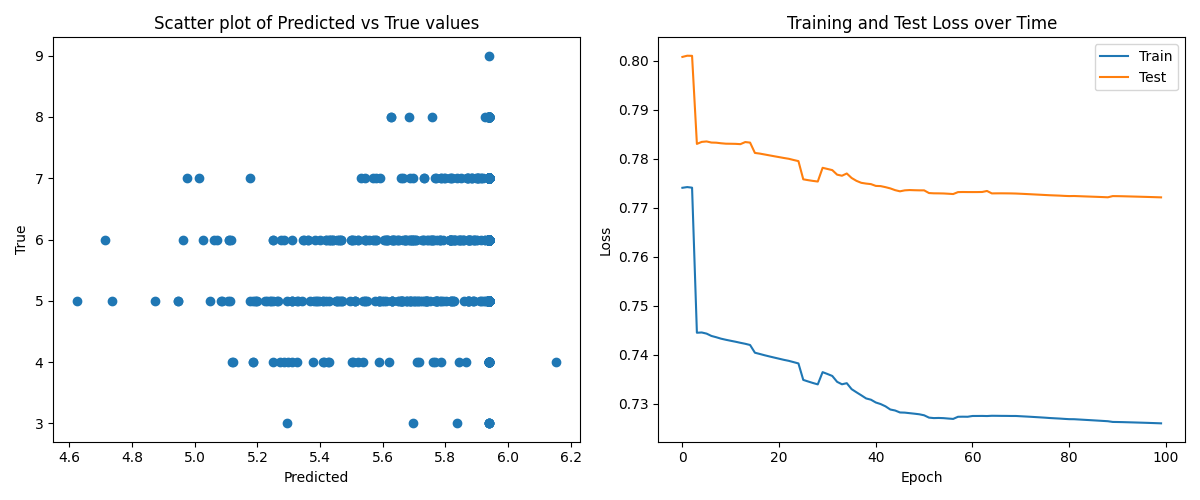

The best result was with Epochs = 100, Nodes = 50, learning rate = 0.00003:
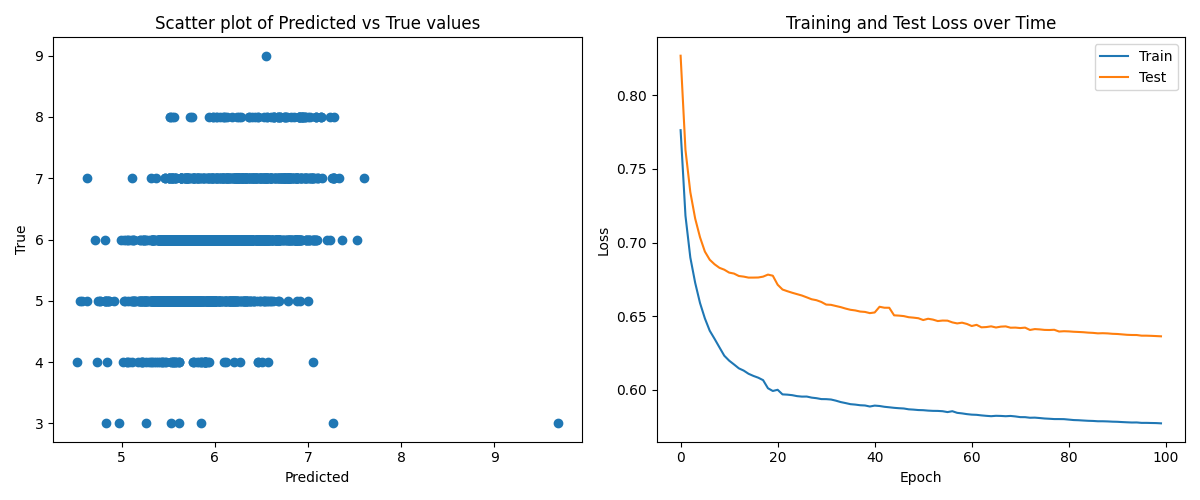


With these inputs the best result of loss was:

    Train Loss: 0.5931351406436695

    Test Loss: 0.6539728897739513
